In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
com=pd.read_csv("computers.csv")
com.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


# feature engneering

In [206]:
mean1=com['Minutes'].mean()

In [207]:
mean1

97.21428571428571

# Visualization

Text(7.5, 99.21428571428571, 'mean is')

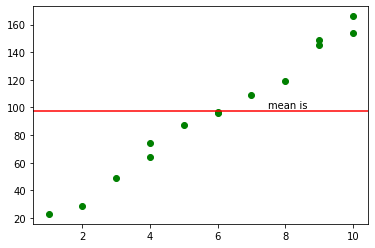

In [213]:
plt.scatter("Units","Minutes",data=com,color='g')
plt.axhline(mean1,c='r')
plt.annotate("mean is",xy=(7.5,mean1+2))

# creating model

In [234]:
model0=com['Minutes'].mean()
model1=12*com['Units']+3
model2=15*com['Units']+4

In [235]:
com['model0']=model0
com['model1']=model1
com["model2"]=model2

In [236]:
model0

97.21428571428571

In [237]:
model1

0      15
1      27
2      39
3      51
4      51
5      63
6      75
7      75
8      87
9      99
10    111
11    111
12    123
13    123
Name: Units, dtype: int64

In [238]:
model2

0      19
1      34
2      49
3      64
4      64
5      79
6      94
7      94
8     109
9     124
10    139
11    139
12    154
13    154
Name: Units, dtype: int64

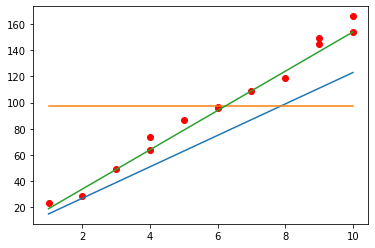

In [240]:
plt.scatter("Units","Minutes",data=com,color='r')
plt.plot("Units","model1",data=com)
plt.plot("Units","model0",data=com)
plt.plot("Units","model2",data=com)

In [243]:
model_all0=pd.DataFrame(
{
    "Units":com.Units,
    "Minutes":com.Minutes,
    "predict":com.model0,
    "Error":com.model0-com.Minutes
})

In [244]:
model_all0

,Units,Minutes,predict,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [252]:
sum(model_all0['Minutes'])
sum(model_all0['Minutes']**2)

1361

In [245]:
model_all1=pd.DataFrame(
{
    "Units":com.Units,
    "Minutes":com.Minutes,
    "predict":com.model1,
    "Error":com.model1-com.Minutes
})

In [246]:
model_all1

,Units,Minutes,predict,Error
0,1,23,15,-8
1,2,29,27,-2
2,3,49,39,-10
3,4,64,51,-13
4,4,74,51,-23
5,5,87,63,-24
6,6,96,75,-21
7,6,97,75,-22
8,7,109,87,-22
9,8,119,99,-20


In [255]:
print(sum(model_all1['Minutes']))
sum(model_all1['Minutes']**2)

1361


160077

In [247]:
model_all2=pd.DataFrame(
{
    "Units":com.Units,
    "Minutes":com.Minutes,
    "predict":com.model2,
    "Error":com.model2-com.Minutes
})

In [248]:
model_all2

,Units,Minutes,predict,Error
0,1,23,19,-4
1,2,29,34,5
2,3,49,49,0
3,4,64,64,0
4,4,74,64,-10
5,5,87,79,-8
6,6,96,94,-2
7,6,97,94,-3
8,7,109,109,0
9,8,119,124,5


In [256]:
print(sum(model_all2['Minutes']))
sum(model_all2['Minutes']**2)

1361


160077

In [259]:
x=com[['Units']]
y=com['Minutes']

In [257]:
from sklearn.linear_model import LinearRegression

In [260]:
new=LinearRegression()

In [261]:
new.fit(x,y)

LinearRegression()

In [262]:
pred=new.predict(x)

In [263]:
pred

array([ 19.67042607,  35.17919799,  50.68796992,  66.19674185,
        66.19674185,  81.70551378,  97.21428571,  97.21428571,
       112.72305764, 128.23182957, 143.7406015 , 143.7406015 ,
       159.24937343, 159.24937343])

In [264]:
y

0      23
1      29
2      49
3      64
4      74
5      87
6      96
7      97
8     109
9     119
10    149
11    145
12    154
13    166
Name: Minutes, dtype: int64

In [265]:
new.coef_

array([15.50877193])

In [266]:
new.intercept_

4.161654135338296

In [267]:
new.score(x,y)

0.9874371980620736

In [271]:
from sklearn.metrics import r2_score
r2_score(y,pred)

0.9874371980620736